In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, BatchNormalization, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, zero_one_loss

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [2]:
data_path = 'C:\\Users\\mooha\\jupyter\\NLP Project\\TextClassification\\dataset.csv'
data = pd.read_csv(data_path, encoding = 'ISO-8859-1')

print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        7570 non-null   object
 1   CancerType  7570 non-null   object
dtypes: object(2)
memory usage: 118.4+ KB
None


,Text,CancerType
0,Thyroid surgery in children in a single insti...,Thyroid_Cancer
1,""" The adopted strategy was the same as that us...",Thyroid_Cancer
2,coronary arterybypass grafting thrombosis ï¬b...,Thyroid_Cancer
3,Solitary plasmacytoma SP of the skull is an u...,Thyroid_Cancer
4,This study aimed to investigate serum matrix ...,Thyroid_Cancer


In [3]:
data['Words Count'] = ''
maxLine = 0

for i in range(len(data)):
    text = data['Text'][i].split() 
    data['Words Count'][i] = len(text)
    
    if len(text) > maxLine:
        maxLine = len(text)
           
print(maxLine)

5259


In [4]:
data['Letters Count'] = data['Text'].apply(len)
print('Max Letters Count document: ', data['Letters Count'].max())
print('index: ', data['Letters Count'].idxmax())

data.head()

Max Letters Count document:  32712
index:  10


,Text,CancerType,Words Count,Letters Count
0,Thyroid surgery in children in a single insti...,Thyroid_Cancer,2871,20707
1,""" The adopted strategy was the same as that us...",Thyroid_Cancer,2494,17018
2,coronary arterybypass grafting thrombosis ï¬b...,Thyroid_Cancer,2954,21622
3,Solitary plasmacytoma SP of the skull is an u...,Thyroid_Cancer,1880,13860
4,This study aimed to investigate serum matrix ...,Thyroid_Cancer,3037,23696


['Thyroid_Cancer' 'Colon_Cancer' 'Lung_Cancer']


<Axes: xlabel='CancerType', ylabel='count'>

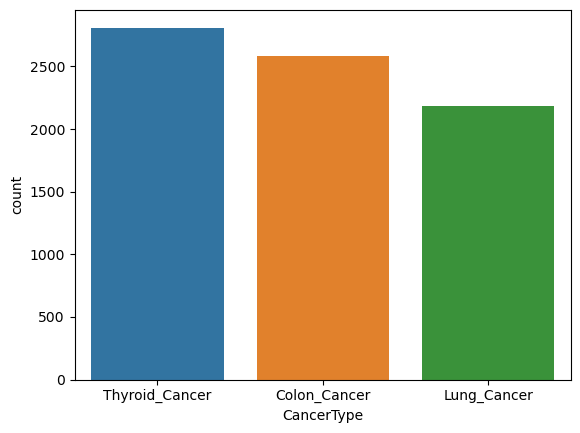

In [5]:
print(data['CancerType'].unique()) #set
sb.countplot(x = data['CancerType'])

In [6]:
# nltk.download()
stopwords = stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
print(data['Text'][0], '\n')
print(len((data['Text'][0].split())))

Thyroid surgery in  children in a single institution from Osama Ibrahim Almosallama Ali Aseerib Ahmed Alhumaida Ali S AlZahranic Saif Alsobhib Saud AlShanafeybFrom the  aDepartment of Surgery College of Medicine Qassim University Buraidah Al Qassim Saudi Arabia  bDepartment of Surgery King Faisal Specialist Hospital and Research Center Riyadh Saudi Arabia cDepartment of Medicine King Faisal Specialist Hospital and Research Center Riyadh Saudi Arabia Correspondence   Dr  Osama Ibrahim  Almosallam  Department of  Surgery  College  of  Medicine Qassim  University  PO  Box   Buraidah  Al  Qassim   Saudi  Arabia  osama_iaahotmailcom ORCID orcid0000000290367564        Citation  Almosallam OI Aseeri A Alhumaid A AlZahrani AS Alsobhi S AlShanafey S Thyroid surgery in  children  in  a  single  institution  from   Ann  Saudi  Med         Received January  Accepted May  Published August  Copyright Copyright   Annals of Saudi Medicine Saudi Arabia This is an   access  under the Creative Commons At

In [8]:
lemmtizer = WordNetLemmatizer()

corpus = []
for i in range(len(data)):
    text = re.sub('[^a-zA-Z]', ' ', data['Text'][i]) #012435789 !@#$%^&
    text = text.lower() 
    tokens = word_tokenize(text) 
    
    words = []
    for word in tokens:
        if word not in stopwords: 
            if len(word) <= 2:
                continue
                
            word = lemmtizer.lemmatize(word, 'n') # playing
            word = lemmtizer.lemmatize(word, 'v') # play
            word = lemmtizer.lemmatize(word, 'a') # play
            word = lemmtizer.lemmatize(word, 'r') # play
            words.append(word)
            
    text = ' '.join(words)
    corpus.append(text)

print(corpus[0], '\n')
print(len(corpus[0].split()), '\n')
print(len(corpus))

thyroid surgery child single institution osama ibrahim almosallama ali aseerib ahmed alhumaida ali alzahranic saif alsobhib saud alshanafeybfrom adepartment surgery college medicine qassim university buraidah qassim saudi arabia bdepartment surgery king faisal specialist hospital research center riyadh saudi arabia cdepartment medicine king faisal specialist hospital research center riyadh saudi arabia correspondence osama ibrahim almosallam department surgery college medicine qassim university box buraidah qassim saudi arabia osama iaahotmailcom orcid orcid citation almosallam aseeri alhumaid alzahrani alsobhi alshanafey thyroid surgery child single institution ann saudi med receive january accept may publish august copyright copyright annals saudi medicine saudi arabia access creative common attributionnoncommercialnoderivatives international license byncnd detail access httpcreativecommons licensesbyncnd fund nonebackground data thyroid surgery child scarceobjective analyze outcome 

In [6]:
# word = 'better'

# word = lemmtizer.lemmatize(word, 'n')
# print(word)

# word = lemmtizer.lemmatize(word, 'v')
# print(word)

# word = lemmtizer.lemmatize(word, 'a')
# print(word)

# word = lemmtizer.lemmatize(word, 'r')
# print(word)

better
better
good
good


In [9]:
max_words = 25000 #10000 - 50000
tokenizer = Tokenizer(num_words = max_words) 
tokenizer.fit_on_texts(corpus)
X = tokenizer.texts_to_sequences(corpus)

le = LabelEncoder()
data['CancerType'] = le.fit_transform(data['CancerType'])
y = data['CancerType']

print(X[0], '\n')
print(y[0])

data.head()

[152, 116, 748, 377, 2508, 24466, 9738, 3070, 7163, 3070, 15063, 116, 1166, 175, 15264, 103, 15264, 2840, 5230, 12687, 116, 6340, 11744, 2808, 137, 72, 293, 13856, 2840, 5230, 24016, 175, 6340, 11744, 2808, 137, 72, 293, 13856, 2840, 5230, 1107, 24466, 9738, 184, 116, 1166, 175, 15264, 103, 1509, 15264, 2840, 5230, 24466, 4699, 4699, 5417, 152, 116, 748, 377, 2508, 1266, 2840, 304, 214, 1522, 735, 36, 239, 392, 892, 892, 8365, 2840, 175, 2840, 5230, 278, 141, 76, 9739, 407, 369, 4454, 528, 278, 1152, 10, 152, 116, 748, 133, 166, 10, 152, 116, 1763, 120, 465, 5793, 95, 174, 80, 371, 1287, 30, 10, 3, 49, 812, 152, 116, 393, 2835, 10, 166, 132, 1330, 3309, 152, 611, 529, 959, 2330, 3963, 1426, 16, 179, 17, 3, 500, 3309, 511, 354, 104, 71, 1832, 49, 41, 205, 2095, 2965, 66, 507, 483, 201, 3, 4264, 2529, 4667, 7004, 329, 661, 3114, 33, 3, 427, 2, 1320, 3, 687, 1929, 299, 217, 85, 1043, 85, 18, 511, 22, 105, 3309, 17279, 3723, 10329, 3309, 24467, 3, 203, 7778, 4790, 7485, 1444, 4197, 1845, 4

,Text,CancerType,Words Count,Letters Count
0,Thyroid surgery in children in a single insti...,2,2871,20707
1,""" The adopted strategy was the same as that us...",2,2494,17018
2,coronary arterybypass grafting thrombosis ï¬b...,2,2954,21622
3,Solitary plasmacytoma SP of the skull is an u...,2,1880,13860
4,This study aimed to investigate serum matrix ...,2,3037,23696


In [11]:
# counter = 0
# for i in range(len(X)):
#     if (len(X[i])) > 2500:
#         counter += 1

# vocab_size = len(tokenizer.word_index) + 1
# print(counter)
# print(vocab_size)

2215
160967


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 44, shuffle = True)

max_Text_length = 1000

X_train = sequence.pad_sequences(X_train, maxlen = max_Text_length, padding = 'post')
X_test = sequence.pad_sequences(X_test, maxlen = max_Text_length, padding = 'post')

In [39]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, '\n')
print((X_train[0]))

(6056, 1000) (6056,) (1514, 1000) (1514,) 

[  357    41    19   444     6 12750   525    40  3311   526  5807 20134
   180    31  3119    31  4714 13933   147    31   106    51   477   852
  2771  7802  8108  2791   147  1380   235   147   477   287    32   147
  1380  7802   147    32   262   216   484   563  2337    80   439   132
   216  1280 13934    90    19  3769   147   235    41   398    20   272
   213     5  1829  2988   417   519  6579  2114  2190     4    92   820
   741   180   723  2791   421   147   751  4624  2791   421   147   171
    14   235    26  2123   174   983  1698     3    67    43    15 20135
   192   206   336  1460    19    15 15346   147    29 10385     3    26
  1046   493  2165 20135 15346   262   646    90  4968  4615    15   784
  8870  7492  1045   649  1369  2562   160  5231   347 11613    58   343
   484   676   262   216  3807  1445    83 24713    60  1623   147  1291
   471  2190    83    25  1293   481  4615    15  5927   279    41 10386
  1218 

In [54]:
model = Sequential()

model.add(Embedding(max_words, 100, input_length = max_Text_length)) 
model.add(LSTM(128)) 
# model.add(BatchNormalization()) 
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(3, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10)

y_pred = model.predict(X_test)

model.summary()

Epoch 1/10
190/190 [==============================] - 147s 762ms/step - loss: 0.6085 - accuracy: 0.7512 - val_loss: 0.2645 - val_accuracy: 0.9221
Epoch 2/10
190/190 [==============================] - 149s 785ms/step - loss: 0.1468 - accuracy: 0.9553 - val_loss: 0.1149 - val_accuracy: 0.9564
Epoch 3/10
190/190 [==============================] - 145s 763ms/step - loss: 0.0970 - accuracy: 0.9638 - val_loss: 0.1066 - val_accuracy: 0.9610
Epoch 4/10
190/190 [==============================] - 143s 755ms/step - loss: 0.1310 - accuracy: 0.9624 - val_loss: 0.1326 - val_accuracy: 0.9584
Epoch 5/10
190/190 [==============================] - 148s 780ms/step - loss: 0.1157 - accuracy: 0.9653 - val_loss: 0.1231 - val_accuracy: 0.9610
Epoch 6/10
190/190 [==============================] - 145s 762ms/step - loss: 0.1122 - accuracy: 0.9657 - val_loss: 0.1333 - val_accuracy: 0.9610
Epoch 7/10
190/190 [==============================] - 147s 773ms/step - loss: 0.1163 - accuracy: 0.9661 - val_loss: 0.1149 -

In [23]:
model.save('C:\\Users\\mooha\\jupyter\\NLP Project\\TextClassification\\model.h5')

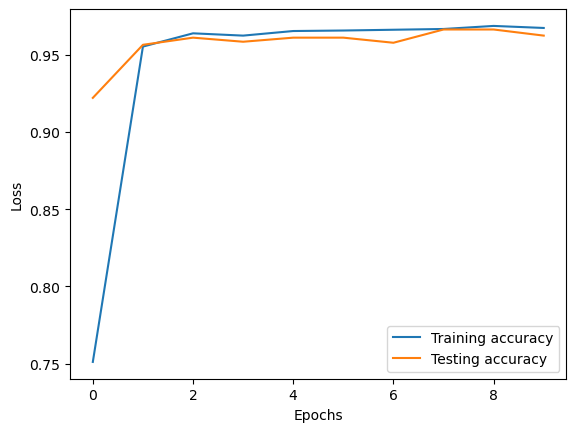

In [55]:
plt.plot(history.history['accuracy'], label = 'Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

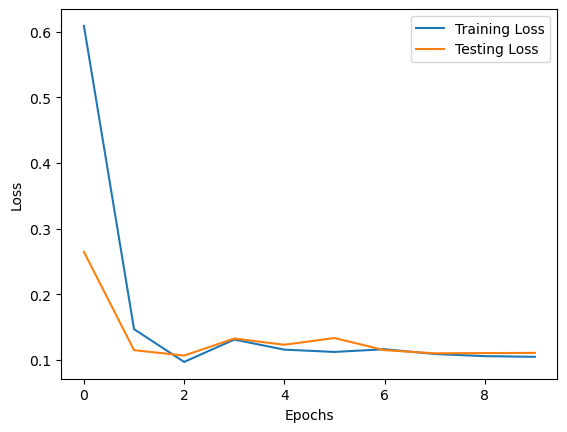

In [56]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [57]:
print(list(y_test[:25]), '\n')
print(y_pred[:25], '\n')

predict = []
for i in range(len(y_pred)):
  predict.append(np.argmax(y_pred[i]))

print(predict[:25], '\n')

cm = confusion_matrix(y_test, predict)
print(cm, '\n')

zol = zero_one_loss(y_test, predict, normalize = False)
print(zol)

[0, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 0, 2] 

[[9.9998301e-01 3.5043865e-07 1.6591228e-05]
 [9.7211229e-04 2.2956567e-06 9.9902552e-01]
 [3.7951409e-05 9.6826533e-08 9.9996191e-01]
 [7.3153780e-05 2.5468269e-06 9.9992424e-01]
 [4.9333513e-02 9.0650886e-01 4.4157680e-02]
 [2.3744232e-04 1.9268664e-06 9.9976063e-01]
 [2.7408215e-04 5.9660181e-07 9.9972534e-01]
 [6.6991728e-05 1.0451742e-07 9.9993283e-01]
 [4.9333528e-02 9.0650886e-01 4.4157680e-02]
 [1.6294980e-05 9.9996465e-01 1.8929026e-05]
 [4.9333513e-02 9.0650886e-01 4.4157680e-02]
 [1.1301145e-04 9.9975574e-01 1.3137142e-04]
 [5.1232350e-05 9.9986696e-01 8.1933344e-05]
 [4.9333528e-02 9.0650886e-01 4.4157680e-02]
 [2.9210314e-05 9.9994260e-01 2.8098706e-05]
 [4.9333528e-02 9.0650886e-01 4.4157680e-02]
 [1.2689171e-04 9.9965584e-01 2.1723886e-04]
 [5.3605473e-01 7.7562348e-04 4.6316966e-01]
 [4.9335506e-02 9.0650499e-01 4.4159535e-02]
 [9.9998420e-01 6.9985212e-08 1.5617623e-05]
 [9.9999684e-01 1.2522

<Figure size 500x500 with 0 Axes>

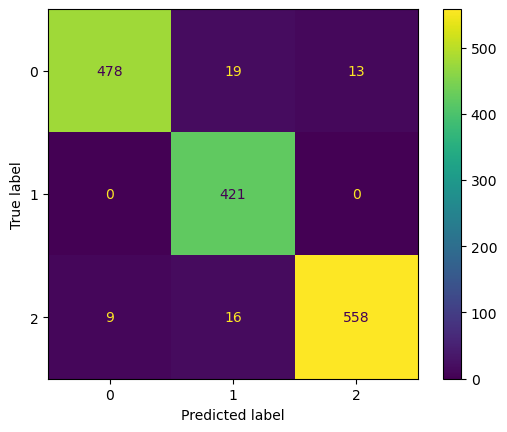

In [58]:
plt.figure(figsize = (5,5))
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [ ]:
test_text = ''' the periparturient period is one of the most challenging periods in dairy cows 
and encompasses the  a0wk prior to and  a0wk after parturition  the  nutrient  requirements  of  dairy
cows  change greatly during this time largely due to the exponential growth of the gravid uterus and fetus followed by the demands of lactation nrc  inflammation oxidative stress and adipose tissue mobilization  lead  to  a  reduction  in  dry  matter  intake  dmi during the periparturient period this reduction in dmi leads to a negative nutrient balance nnb with a shortfall in the nutrient availability  for  the  cow  and  fetus  ingvartsen  and  andersen   additionally  this  reduction  in  dmi  also  increases  the risk of metabolic ketosis fatty liver milk fever and immunerelated disorders the risk of these diseases poor reproduction and low efficiency is greatly impacted by the degree and length of time during which these systems metabolism and immune response remain out of balance loor et a0al 2013a much of the research  over  the  last  decade  have  examined  these  biological interactions to identify the mechanisms behind the metabolic physiologic  and  immune  adaptations  that  occur  during  the periparturient period loor et a0al 2013a 2013b roche et a0al  bradford et a0al it  is  now  known  that  nutrients  such  as  amino  acids  aa serve  functional  roles  outside  of  their  use  as  building  blocks for  proteins  and  have  immunomodulatory  properties  and interact through common biochemical pathways eg 1carbon metabolism  figure a0   this  concept  has  been  well  explored in  nonruminant  species  li  et a0 al    sikalidis    with nutritional  management  during  the  periparturient  period continuing  to  be  an  active  area  of  research  it  is  important  to develop a system understanding the potential immunometabolic role  that  dietary  aa  may  play  during  this  period  thus  the objective of this review is to provide an overview of physiological adaptations  during  the  periparturient  period  the  immune system and methods to assess immune function and oxidative stress this will be followed by a more specific discussion of the immunometabolic roles of specific aa and their potential effects in  dairy  cow  during  the  periparturient  period  the  potential effects  of  enhanced  aa  supply  during  the  preweaning  period will also be discussed brieflybiological adaptations in the transition cow”a brief overviewduring  the  nnb  associated  with  the  periparturient  period biological  mechanisms  coordinate  the  mobilization  of  body reserves  in  order  to  support  fetal  growth  and  milk  production bauman  and  currie   insulin concentrations  are  reduced  and  the  response  of  hormonesensitive  lipase  in  adipose  tissue  eg  low  insulin  high growth  hormone  and  catecholamines  or  high  glucocorticoid concentrations  is  greater  to  facilitate  lipid  mobilization this  periparturient  period  is  also  characterized  by  a  state  of inflammation encompassing an increase in hepatic production of  positive  acutephase  proteins  app  such  as  haptoglobin and serum amyloid a a0saa and a decrease in the production ingvartsen    the authors  published by oxford university press on behalf of the american society of animal sciencethis is an open access  distributed under the terms of the creative commons attribution noncommercial license httpcreativecommonslicensesbync40 which permits noncommercial reuse distribution and reproduction in any medium provided the original work is properly cited for commercial reuse please contact  spermissionsoupcoms175 0cs176    of animal science  vol  no suppl abbreviationsaa akt app asct2 bcaa bcat bcka bhmt bmec bsa cbs csad cth dmi gator1 gcl gclc gpx gsh gsr gss il inos kegg klh lps mpo mtor mtorc1 mtr nfe2l2 nfÎºb nnb nos pc pmn pmnl pmtor rns rom ros rpm saa sahh sam samtor sell shmt slc1a1 slc1a5 sod stat tag th tlr tnfÎ± vldl amino acidsprotein kinase bacutephase proteinsalanineserinecysteine transporter branchedchain amino acidsbranchedchain amino transferasesbranchedchain Î±ketoacidsbetaine homocysteine methyltransferasebovine mammary epithelial cellsbovine serum albumincystathionine synthasecysteine sulfinic acid decarboxylasecystathionine gammalyasedry matter intakegtpaseactivating protein activity towards rags glutamate cysteine ligaseglutamate cysteine ligase catalyticglutathione peroxidaseglutathioneglutathione reductaseglutathione synthaseinterleukininducible noskyoto encyclopedia of genes and genomeskeyhole limpet hemocyaninlipopolysaccharidemyeloperoxidasemechanistic target of rapamycinmtor complex 5methyltetrahydrofolatehomocysteine methyltransferasenuclear factor erythroid 2like2nuclear factor kappa bnegative nutrient balancenitric oxide synthasephosphatidylcholinepolymorphonuclear neutrophilspolymorphonuclear leukocytesphosphorylated mtorreactive nitrogen speciesreactive oxygen metabolitesreactive oxygen speciesrumenprotected metserum amyloid asadenosyl homocysteine hydrolasesadenosyl methioninesadenosylmethionine sensor upstream of mtorlselectinserine hydoxymethyltransferasesolute carrier family  member solute carrier family  member superoxide dismutasesignal transducer and activator of transcriptiontriacyglycerolthelpertolllike receptorstumor necrosis factorÎ±verylowdensity lipoproteinsof  negative  app  such  as  albumin  bertoni  et a0 al    it  has been  well  established  that  these  responses  are  mediated  by the  proinflammatory  cytokines  interleukin  il6  il1  and tumor necrosis factorÎ± tnfÎ± kindt et a0al  additionally oxidative  stress  also  occurs  during  this  period  and  is  driven by  the  imbalance  between  the  production  of  reactive  oxygen metabolites  rom  reactive  nitrogen  species  rns  and  the neutralizing  capacity  of  antioxidant  mechanisms  in  tissues and  blood  some  of  the  wellestablished  cellular  antioxidants include glutathione gsh taurine superoxide dismutase sod and vitamins a a0and e bernabucci et a0al  when oxidative stress overwhelms cellular antioxidant capacity rom induce an inflammatory response that is controlled via changes in mrna abundance  of  transcription  regulators  eg  signal  transducer and  activator  of  transcription    [stat3]  nuclear  factorkappa b  [nfÎºb] the  increase  in  oxidative  stress  and  inflammation during this period is also negatively associated with a reduction in  liver  functionality  and  measurement  of  app  can  provide a  useful  tool  to  assess  liver  function  as  well  as  inflammation bertoni and trevisi during  the  periparturient  period  aa  metabolism  is  also altered  with  moderate  carcass  protein  losses  reported  even when animals are fed to their predicted metabolizable protein requirements  bell  et a0 al    additionally  circulating  aa concentrations  change  dramatically  with  favorable  circulating profiles  of  many aa  not  being  restored  until    d  postpartum zhou et a0al 2016b furthermore the total concentration of aa in plasma reaches a nadir around day  postpartum zhou et a0al 2016b which corresponds to a peak in total disease incidence during  early  lactation  ingvartsen    this  decrease  in circulating  aa  is  likely  associated  with  the  increased  use  of aa  for  gluconeogenesis  as  well  as  for  hepatic  production  of app thus it is important to investigate how supplemental aa during  the  periparturient  period  may  modulate  metabolism and  immune  responses  to  promote  production  and  reduce susceptibility to diseasegeneral overview of the immune a0systemthe immune system consists of both the adaptive and innate immune responses which are linked together through signaling molecules  such  as  cytokines  the  innate  immune  system  is the  first  line  of  defense  and  includes  physical  barriers  such as  epithelial  cell  layers  that  express  tight  cell  junctions  and the  mucus  layer  of  the  respiratory  gastrointestinal  and genitourinary tracts chaplin  cells involved in the innate immune  response  include  macrophages  polymorphonuclear neutrophils  pmn  dendritic  cells  mast  cells  eosinophils natural killer cells and natural killer t cells turvey and broide  the  focus  of  the  present  review  is  on  the  effects  of aa on  phagocytic  cells  that  is  cells  that  engulf  and  kill  such  as macrophages  and  pmn  macrophages  not  only  phagocytose invading pathogens but also produce cytokines such as ils and tnfÎ±  which  initiate  innate  and  adaptive  immune  responses and recruit pmn to the site of infection chaplin the  adaptive  immune  response  consists  of t  lymphocytes b  lymphocytes  and  humoral  factors  marshall  et a0 al   there  are  two  types  of t  lymphocytes  cytotoxic t  cells  cd8 cells and thelper th cells cd4 cells marshall et a0al  cytotoxic t  cells  detect  and  eliminate  infected  cells  while th cells produce ils and interferonÎ³ ingvartsen and moyes  the b lymphocytes are cells that produce antibodies that bind to  antigens  on  the  surface  of  pathogens  to  mark  them  for destruction marshall et a0al  0ccoleman et a0al   s177aa immune function and oxidative a0stressduring  the  periparturient  period  the  metabolic  status  is associated with the inflammatory regulation of peripheral blood mononuclear  cells  with  a  more  pronounced  inflammatory response in those cells during the nnb immediately postpartum agrawal  et a0 al    mann  et a0 al    this  period  is  also associated  with  altered  signaling  of  nutrientsensing  kinases in  immune  cells  such  as  the  protein  kinase  b  akt  and mechanistic  target  of  rapamycin  mtor  pathway  which  may modulate cytokine production mann et a0al  aa can directly and indirectly alter the immune system besides being used in energy metabolism reactions and the synthesis of proteins aa are critical for the synthesis of other functional molecules such as the antioxidants gsh and taurine no histamine and hydrogen peroxide  li  et a0 al   thus  this  section  of  the  review  will focus on the role that aa play in modulating immune function and  oxidative  stress  in  dairy  cows  during  the  periparturient period a a0special focus will be placed on aa involved in 1carbon metabolism as this represents an interconnected route through which  aa  could  impact  molecular  events  such  as  epigenetic regulation  protein  synthesis  via  mtor  energy  metabolism and antioxidant synthesis a a0summary of studies investigating the  effects  of aa  on  immune  function  and  oxidative  stress  in dairy cows is provided in table a0 a a0summary model of how aa might alter immune function and oxidant status is depicted in figure a0methioninemethionine not only is essential for protein synthesis but also serves as a functional nutrient that is needed for the production of  the  antioxidants  gsh  and  taurine  atmaca    and provision of methyl groups finkelstein  these features are exemplified by the central role of met in 1carbon metabolism figure a0   in  these  pathways  met  is  used  to  synthesize sadenosyl methionine sam which can be used to methylate dna  and  to  support  phosphatidylcholine  pc  and  carnitine synthesis for fatty acid metabolism vance et a0al  during the periparturient period triacyglycerol tag accumulate in the liver  leading  to  mitochondrial  dysfunction  inflammation  and reduced liver function li et a0al  du et a0al  pc is the main phospholipid component of verylowdensity lipoproteins vldl  vance    thus  enhancing  pc  synthesis  through greater  met  supply  may  help  improve  vldl  synthesis  and reduce hepatic tag accumulationas  part  of  1carbon  metabolism  homocysteine  can  be remethylated  to  met  using  betaine  or  folate  as  methyl  donors bhmt  and via  betaine  homocysteine  methyltransferase 5methyltetrahydrofolatehomocysteine methyltransferase mtr  respectively  homocysteine  is  also  used  to  synthesize cystathionine  via  cystathionine  synthase  cbs  in  the  first reaction  of  the  transsulfuration  pathway  banerjee  et a0 al   cystathionine  is  used  to  make  cys  which  is  utilized  to synthesize the antioxidants taurine or gsh cbs is allosterically figure    interrelationships  among  components  of  the  1carbon  metabolism  pathway  methionine  cycle  folate  cycle  and  transsulfuration  pathway  5mthf 5methyltetrahydrofolate amd1 adenosylmethionine decarboxylase  arg arginase b12 cobalamin b2 riboflavin b6 pyridoxal ²phosphate cbs cystathionine betasynthase  dcsam  decarboxylated  sadenosylmethionine  dhfr  dihydrofolate  reductase  dnmt  dna  methyltransferase  dtmp  thymidine  monophosphate dump  deoxyuridine  monophosphate  ftcd  formimidoyltransferase  cyclodeaminase  gnmt  glycine  nmethyltransferase  mat  methionine  adenosyltransferase mthfr methylenetetrahydrofolate reductase mtrr 5methyltetrahydrofolatehomocysteine methyltransferase reductase odc1 ornithine decarboxylase  pemt phosphatidylethanolamine nmethyltransferase sahh sadenosylhomocysteine hydrolase shmt serine hydroxymethyltransferase sms spermine synthase srm spermidine synthase tdh threonine dehydrogenase thf tetrahydrofolate tyms thymidylate synthetase  0cs178    of animal science  vol  no suppl activated  by  sam  banerjee  et a0 al    therefore  enhanced sam  production  with  increased  met  supply  can  help  enhance the flux of the transsulfuration pathway increasing taurine and gsh production to help reduce oxidative a0stressin  dairy  cattle  low  levels  of  serum  met  postpartum  are associated with severe hepatic lipidosis shibano and kawamura   and  other  than  his  met  is  the  only  aa  for  which  net uptake  by  the  liver  increased  pre  and  postpartum  larsen and  kristensen   therefore  enhancing  postruminal  met supply during the periparturient period is of interest to increase circulating concentrations of met for its functional roles in the body the  work  from  dalbach  et a0 al    demonstrated  that rumenprotected  met  rpm  can  be  used  to  increase  serum concentrations  of  met  in  the  first  2wk  postpartum  which will  enhance  the  availability  of  met  for  protein  synthesis  and metabolism via the 1carbon pathways in terms of production supplementation  of  met  during the  peripartal  period concomitantly  increases  milk  yield  milk  protein  and  milk fat  soon  after  calving  ordway  et a0 al    osorio  et a0 al   these  responses  are  in  large  part  driven  by  enhancing  met availability  and  by  the  additional  flux  of  met  through  the  met cycle in the liver which consequently increases the production of downstream compounds such as sam pc gsh and taurine additionally work feeding rpm during the periparturient period has detected positive responses in maintaining consistent rates of dmi prepartum last  d and faster and greater rates of dmi during the first  to  d after calving osorio et a0al  zhou et a0 al  2016c  batistel  et a0 al    the  same  milk  production response  was  also  observed  when  met  was  supplemented postpartum as the isopropyl ester of 2hydroxy4methylthiobutanoic acid stpierre and sylvester as described earlier the transient inflammatorylike status around  parturition  appears  to  be  a  œnormal  aspect  of  the adaptations  to  lactation  as  cows  approach  parturition  those with greater but still subclinical concentrations of circulating cytokines have greater inflammation and oxidative stress and lower  liver  function  along  with  lower  milk  yield  and  lower postpartum  dmi  bertoni  et a0 al    in  addition  to  their function  in  the  immune  system  cytokines  interferons  and tnfÎ± also elicit pathophysiological effects leading to œsickness table   summary of studies in dairy cows investigating the effects of supplemental aa on immune function oxidative stress and inflammation tissuecellstreatmentmain outcomeplasmarpm for  d prepartum and  d postpartumimprovements in plasma biomarkers indicating reduced oxidative stress and inflammation and enhanced liver function increased neutrophil phagocytosis and oxidative burstreferencebatistel et a0al plasmaabomasal infusion of glu for first infusions of gln increased the abundance of cd4 tcells on day  doepel et a0al  d postpartumpostpartum and increased the abundance of monocytesmammary rpm for  d prepartum and  d methionine supply upregulated expression of genes involved in han et a0al glandplasmapostpartumantioxidant metabolism and increased activation of nfe2l2intravenous infusions of gln for  glutamine infusion decreased plasma haptoglobin and increased jafari et a0al d postcalvinglpsbinding protein and saa subcutaneous rpm for  d prepartum and  d enhanced met supply increased mrna and protein abundance of liang et a0al 2019aadiposepmnlpostpartumenzymes related to gsh metabolismincubation with met andor supplemental met coupled with adequate choline enhanced gene lopreiato et a0al cholineexpression of pathogen recognition mechanisms methionine ameliorated the increased inflammation and oxidative stress observed when cells were incubated without choline plasma and protected gln for  d postpartum increased total blood protein and albumin decreased plasma nemati et a0al milkwhole bloodrpm for  d prepartum and  d aspartate aminotransferase and milk somatic cell countincreased whole blood neutrophil phagocytosis on day  osorio et a0al 2013apostpartumpostpartum with supplemental metliverrpm for  d prepartum and  d methionine supply altered flux through 1carbon metabolism via osorio et a0al 2014aliver and plasmaplasmapostpartumchanges in mrna to support antioxidant and met synthesisrpm for  d prepartum and  d methionine increased liver gsh and decreased concentrations of osorio et a0al 2014bpostpartum plasma biomarkers of inflammationrpm for  d during midlactation increased proliferative ability of peripheral blood t lymphocytes soder and holden with supplemental metplasmarpm for  d prepartum and increased antioxidant capacity of plasma and cd4cd8 t sun et a0al postpartumlymphocyte ratio with met supplywhole bloodrpm for  d prepartum and  d methionine damped the hyperresponse of il1 during an lps vailatiriboni et a0al plasmajugular infusion of arg and lps in arginine alleviated lpstriggered inflammation by decreasing il6 zhao et a0al 2018apostpartumchallenge through improvements in oxidative stressserumjugular infusion of arg and lps in infusion of arg promoted antioxidant mechanisms during lpszhao et a0al 2018bmidlactation cowsinducible nos and lpsbinding proteinmidlactation cowsrpm for  d prepartum and  d postpartumrpm for  d prepartum and  d triggered inflammation by increasing total antioxidant capacity and gsh peroxidase activity and decreasing malondialdehyde increased hepatic gsh and improved plasma biomarkers of liver function and inflammation with met neutrophil phagocytosis capacity and oxidative burst were also increased with metenhanced met supply increased mrna expression of genes zhou et a0al 2016azhou et a0al 2017bpostpartumassociated with pc and antioxidant synthesisrpm for  d prepartum and  d decreased expression of genes related to inflammation and zhou et a0al 2018bliver and plasmaliver pmnlpostpartumoxidative stress 0ccoleman et a0al   s179figure    the  theoretical  model  of  cellular  aa  utilization  amp  adenosine  monophosphate  atp  adenosine  triphosphate  ctp  cytidine  triphosphate  dttp deoxythymidine triphosphate gmp guanosine monophosphate imp inosine monophosphate no nitric oxide r5p ribose 5phosphate tca cycle tricarboxylic acid cycle ump uridine monophosphate utp uridine5²triphosphatebehaviors  whose  primary  manifestation  is  satiety  larson and dunn  an example of this behavior in dairy cows is the  reduction  in  dmi  around  calving  in  mice  these  cytokines have been shown to reduce meal size and duration as well as decrease  meal  frequency  and  prolong  intermeal  intervals platasalamÃ¡n  furthermore cytokines directly affect the hypothalamus il1 and ifn act directly and specifically on the glucosesensitive  neurons  in  the  brain  œsatiety  and  œhunger sites platasalamÃ¡n in  addition  to  increases  in  dmi  and  milk  production  rpm supplementation  during  the  periparturient  period  has  been associated  with  positive  health  responses across  four  studies osorio et a0al 2014b sun et a0al  zhou et a0al 2016a batistel et a0 al    there  have  been  consistent  improvements  in the  concentrations  of  plasma  biomarkers  of  inflammation where il1 and haptoglobin have decreased and albumin has increased summarized in table a0 improvements in biomarkers of oxidative stress have also been observed with enhanced met supply during the periparturient period in the study by batistel et a0al  plasma concentrations of ferricreducing antioxidant power carotene tocopherol and total and reduced gsh were increased with rpm while rom were lower sun et a0al  also observed an improvement in blood antioxidant status with rpm increasing  total  antioxidant  capacity  glutathione  peroxidase gpx activity and vitamin e a0a a0similar effect was observed in liver  tissue  by  osorio  et a0 al  2014b  where  cows  fed  rpm  had greater hepatic concentrations of total and reduced a0gshfrom  a  mechanistic  standpoint  changes  in  the  mrna abundance of sadenosyl homocysteine hydrolase sahh mtr sod1  glutamate  cysteine  ligase  catalytic  gclc  subunit  and dna methyltransferase 3a suggested alterations in flux through 1carbon metabolism osorio et a0al 2014a importantly sahh the enzyme that makes homocysteine from sadenosylhomocysteine was  upregulated  with  met  which  would  support  a  supply  of homocysteine  to  be  used  for  antioxidant  and  met  synthesis furthermore in the study by zhou et a0al 2016a greater met supply compared with rumenprotected choline increased antioxidant concentration  in  liver  tissue  despite  a  lower  concentration of  pc those  responses  were  due  to  the  greater  abundance  of phosphatidylethanolamine  methyltransferase the  enzyme that  utilizes  sam  and  phosphatidylethanolamine  to  make  pc and cbs zhou et a0al 2017b additionally enhanced met supply during the periparturient period was observed to increase mrna and protein abundance of enzymes related to gsh metabolism in subcutaneous adipose tissue suggesting greater activation of those pathways liang et a0al 2019a a a0greater dietary supply of choline did not change the mrna abundance of bhmt and mtr in cows zhou et a0al 2017ba positive effect of met supplementation on mammary gland antioxidant  mechanisms  was  observed  by  han  et a0 al   mrna abundance of gpx1 gclc glutamate cysteine ligase gcl modifier  subunit  malic  enzyme    ferrochelatase  and  ferritin heavy chain  and genes involved in gsh and iron metabolism were  upregulated  protein  abundance  of  phosphorylated nuclear factor erythroid 2like2 nfe2l2total nfe2l2 was also increased han et a0al  nfe2l2is a regulator of transcription of  antioxidant  genes  hence  an  increase  in  phosphorylated nfe2l2  suggested  greater  activation  of  antioxidant  systems and  is  likely  one  of  the  mechanisms  behind  the  changes  in mrna  abundance  lastly  across  studies  there  has  also  been a  consistent  improvement  in  the  concentrations  of  plasma biomarkers of liver function such as increases in paraoxonase and cholesterol with rpm osorio et a0al 2014b zhou et a0al 2016a batistel  et a0 al    which  is  likely  linked  to  the  reduction  in inflammation and oxidative stress thus the consistent changes across  studies  in  metabolites  and  plasma  biomarkers  as  well as mrna abundance across tissues indicate that enhanced met supply during the periparturient period reduces oxidative stress and inflammation however more work is needed to verify the exact mechanisms behind the observed changes 0cs180    of animal science  vol  no suppl enhanced postruminal supply in the form of rpm during the periparturient  period  has  been  associated  with  improvements in  immune  cell  function  when  rpm  was  provided  for    d prepartum  and    d  postpartum  whole  blood  neutrophil phagocytosis was increased compared with control cows at  d  postpartum  osorio  et a0 al    in  the  study  by  zhou  et a0 al 2016c  rpm  supplementation  from  day  ˆ’  prepartum  to  day   postpartum  increased  neutrophil  phagocytosis  capacity and  oxidative  burst  activity  zhou  et a0 al  2016a  this  same improvement  in  neutrophil  immune  function  was  observed when  rpm  was  supplied  from  day  ˆ’  prepartum  to  day   postpartum  batistel  et a0 al    furthermore  an  increase  in the proliferative ability of peripheral blood t lymphocytes was observed when rpm was supplemented to midlactation cows soder and holden zhou  et a0 al  2018b  isolated  polymorphonuclear  leukocytes pmnl  and  observed  lower  abundance  of  genes  related  to inflammation  il1b  tlr2  nfÎºb  and  stat3  and  oxidative stress  cbs  gpx1  glutathione  synthase  [gss]  and  sod2  as well as an increase in plasma taurine with supplemental met suggesting  a  better  redox  and  inflammatory  status  of  those cells additionally  those  same  cows  were  used  for  an  ex  vivo whole blood challenge with lipopolysaccharide lps to further investigate  immune  cell  responses  during  this  challenge  a table    summary  of  additional  beneficial  effects  of  feeding  rpm during the transition period and early lactationbiomarkerresponse12sitebiological functionmetabolism  carnitine  cholesterolonecarbon metabolism  cystathionine betasynthase activity  cystathionine  cystine  homocysteineinflammation il1beta  haptoglobin  albumin  oxidative stress  rom†‘†‘†‘†‘†‘†‘†‘†“†“†“†‘†‘liveroxidation of fatty acidsplasmalipoprotein metabolismliverplasmaplasmaplasmaantioxidant synthesish2s biosynthesis redox statusredox statusmethylation reactionsplasmaproinflammatory cytokineplasmainflammation signalplasmaacutephase response†”†“plasmaperoxides   gsh  taurine  antioxidant capacity  paraoxonase†‘†‘†”†‘†”†‘†‘†‘superoxide ohradicalsliver blood antioxidantantioxidantplasmaplasmatotal antioxidants in bloodplasmaantioxidant enzyme†‘ beneficial increase †“ beneficial decrease †” no change in concentration2relative to a control or rumenprotected choline supplemented diet osorio et a0al 2014b zhou et a0al 2016a sun et a0al  batistel et a0al  vailatiriboni et a0al hyperresponse in il1 was observed around parturition which likely  arose  from  oxidative  stress  vailatiriboni  et a0 al   however rpm supplementation dampened this hyperresponse likely through improvements in oxidative stress vailatiriboni et a0al the  recent  work  by  lopreiato  et a0 al    investigated  the effects  of  incubating  bovine  pmnl  with  met  andor  choline and  observed  that  supplemental  met  coupled  with  adequate choline  enhanced  gene  expression  of  tlr2  and  lselectin sell  which  are  pathogen  recognition  mechanisms  in  the same experiment cells incubated without choline had greater mrna  abundance  of  il1b  il6  il10  and  myeloperoxidase mpo glutathione reductase gsr gss cystathionine gammalyase  cth  and  cysteine  sulfinic  acid  decarboxylase  csad indicating  greater  inflammation  and  oxidative  stress  this effect  however  was  ameliorated  by  supplementing  additional met  lopreiato  et a0 al   thus  the  increased  dmi  and  milk production observed when feeding rpm can be partly explained by  a  reduction  in  inflammation  as  it  directly  at  the  hepatic level  and  by  dampening  the  immune  cell  overresponse  and indirectly reducing oxidative stress decreases circulating proinflammatory cytokinesenhanced  met  supply  during  the  periparturient  period has  also  been  associated  with  changes  in  mtor  signaling mtor  is  a  serinethreonine  kinase  that  plays  a  central  role  in integrating environmental cues from growth factors nutrients particularly aa and energy powell et a0al  in dairy cattle mtor has traditionally been studied in the context of its role in regulating protein synthesis however work from humans and nonruminant species has indicated that mtor is an important regulator  of  immune  responses  powell  et a0 al    jones  and pearce  when activated by aa mtor directs an activation of anabolic metabolism which allows growth proliferation and development this  makes  the  activation  of  mtor  in  immune cells  particularly  important  for  maintaining  proliferation  and without  proper  activation  cells  may  enter  periods  of  growth arrest  jones  and  pearce    methionine  specifically  may interact with mtor via the production of sam specifically sam can  bind  to  sadenosylmethionine  sensor  upstream  of  mtor samtor  a  protein  that  inhibits  mtor  complex    mtorc1 by  interacting  with  gtpaseactivating  protein  activity  towards rags  gator1 gu et a0al  when sam binds to samtor it  inhibits  the  association  of  samtor  and  gator1  allowing mtorc1 to be activated gu et a0al to  our  knowledge  there  is  only  one  study  investigating the expression of mtor signaling proteins in immune cells in dairy  cattle  and  work  is  also  lacking  in  nonruminant  species in  periparturient  cows  the  activation  of  aktmtor  signaling in  immune  cells  was  reduced  postpartum  compared  with prepartum mann et a0al  importantly agrawal et a0al  also identified the expression of aa transporters and the kyoto encyclopedia  of  genes  and  genomes  kegg  pathways  related to  1carbon  metabolism  and  mtor  in  pmnl  from  peripartal cows a a0 list  of  these  transporters  and  kegg  pathways  related to  aa  and  1carbon  metabolism  are  summarized  in  table a0  together these studies support the potential importance of aa for nutrient signaling in immune a0cellsrecent work indicating that enhanced met supply activates mtor  signaling  in  the  mammary  gland  supports  its  role  in enhancing  protein  synthesis  for  example  in  vitro  enhancing met  supply  to  immortalized  bovine  mammary  epithelial cells  bmec  by  varying  the  ratio  of  lys  to  met  increased  the concentration  and  utilization  of  essential  aa  particularly branchedchain  aa  bcaa  dong  et a0 al    this  change  0cwas  potentially  mediated  by  alterations  in  aa  transporters controlled by mtor dong et a0al  other studies with bmec have also revealed a potential for greater mtor activation when met supply is enhanced nan et a0al  sala ma et a0al in  vivo  the  effects  of  supplemental  met  during  the periparturient  period  on  mtor  signaling  were  explored  using cows from the study by batistel et a0al  in the mammary gland  cows  receiving  rpm  had  lower  protein  abundance  of total  mtor  and  phosphorylated  mtor  pmtor  compared with  control  cows  on  day    postpartum  but  the  ratio  of pmtortotal  mtor  was  not  different  suggesting  that  there was no difference in mtor activation between treatments ma et a0 al    however  changes  in aa  transporters  and  insulin signaling  indicated  that  insulin  sensitivity  of  the  mammary gland was enhanced with supplemental met ma et a0al  in subcutaneous adipose tissue the mrna and protein abundance of  some  aa  transporters  and  pmtor  were  upregulated  with enhanced  met  supply  while  changes  in  insulin  signaling  and plasma glucose also indicated that met helped improve insulin sensitivity  liang  et a0 al  2019b  thus  enhancing  met  supply during  the  periparturient  period  may  lead  to  mtor  activation in  immune  cells  as  well  as  improved  nutrient  uptake  which could help to support proliferation and development additional work in ruminants and nonruminants is needed to understand whether met modulates mtor signaling in immune cellscysteinecysteine can be synthesized endogenously from homocysteine as  described  earlier  and  is  needed  to  synthesize  gsh  and taurine  gsh  is  synthesized  via  two  enzymes  gcl  and  gss lushchak  to synthesize taurine cysteine sulfinic acid is first synthesized from cysteine by cysteine dioxygenase and can then be utilized by csad to produce taurine park et a0al  dietary  cys  has  been  explored  as  a  way  to  improve  health  in nonruminant species and humans under a variety of conditions including  type2  diabetes  cardiovascular  disease  and  liver disease  to  name  a  few  yin  et a0 al   across  these  studies increased  dietary  cys  increased  the  concentrati
'''
test_text = tokenizer.texts_to_sequences(test_text)
test_text = sequence.pad_sequences(test_text, maxlen = 1000, padding = 'post')
# print(test_text, '\n')

predict = model.predict(test_text)
print(predict)

In [26]:
test_text = ''' Incidence Differences Between First PrimaryCancers and Second Primary Cancers
FollowingSkin Squamous Cell Carcinoma as Etiological CluesThis  was published in the following Dove
Press journalClinical Epidemiology“ KristinaGuoqiao ZhengSundquist4“ Jan Sundquist AkseliAsta F¶rsti
KariHemminkiHemminki12411“1Division of Molecular GeneticEpidemiology German Cancer ResearchCenter DKFZ
Heidelberg D69120Germany 2Division of CancerEpidemiology German Cancer ResearchCenter DKFZ Heidelberg
D69120Germany 3Faculty of Medicine Universityof Heidelberg Heidelberg Germany4Center for Primary Health
Care ResearchLund University Malm¶   Sweden5Department of Family Medicine andCommunity Health Department
ofPopulation Health Science and Policy IcahnSchool of Medicine at Mount SinaiNew York NY USA 6Center forCommunityBased Healthcare Researchand Education CoHRE Department ofFunctional Pathology School of MedicineShimane University Izumo Japan 7HoppChildren™s Cancer Center KiTZHeidelberg Germany 8Division ofPediatric Neurooncology German CancerResearch Center DKFZ German CancerConsortium DKTK HeidelbergGermany 9Cancer Gene Therapy GroupTranslational Immunology ResearchProgram University of Helsinki HelsinkiFinland 10Comprehensive Cancer CenterHelsinki University Hospital HelsinkiFinland 11Faculty of Medicine andBiomedical Center in Pilsen CharlesUniversity in Prague Pilsen  CzechRepublicCorrespondence Kari HemminkiDivision of Cancer Epidemiology GermanCancer Research Center DKFZ ImNeuenheimer Feld  Heidelberg GermanyTel  Fax  Email karihemminkidkfzdeBackground Most literature on second primary cancers SPCs focuses on possible factorswhich may increase the risk of these cancers and little attention has been paid for the overallincidence differences between ï¬rst primary cancers FPCs and same SPCs We wanted tocompare the incidence rates for all common cancers when these were diagnosed as FPCs andSPCs after invasive and in situ squamous cell carcinoma SCC of the skin which are usuallytreated by surgery onlyMethods Cancers were identiï¬ed from the Swedish Cancer Registry from the years through to  and they included in addition to skin cancers  male cancers totaling patients and  female cancers totaling  patients Standardized incidencerates and relative risks RRs were calculated for sexspeciï¬c common cancers as FPC and asSPC after skin SCC Spearman rank correlations were used in the analysis of incidenceranking of FPC and SPCResults Of total  men and  women developed invasive SCC and  menand  women in situ SCC The total number of  other male cancers was  andof  female cancers it was  Rank correlations ranged from  to  P5—ˆ’indicating that overall skin SCC did not interfere with SPC formation The exceptions wereincreased SPC risks for melanoma sharing risk factors with skin SCC and nonHodgkin andHodgkin lymphoma and cancers of the upper aerodigestive tract connective tissue and maleand female genitals suggesting contribution by skin cancer initiated immune dysfunctionConclusion The incidence ranking of SPCs after skin cancers largely follows the incidenceranking of FPCs indicating that overall skin SCC does not greatly interfere with the intrinsiccarcinogenic process The main deviations in incidence between FPC and SPC appeared tobe due to shared risk factors or immunological processes promoting immune responsivecancer typesKeywords skin cancer second cancer ï¬rst primary cancer immune disturbancePlain Language SummaryIn this study we compared the incidence of ï¬rst primary cancers and the incidence of thesame cancers as second primary cancer after squamous cell skin cancer Skin cancers aretreated by surgery which is not a risk for second cancer but skin cancers show immunological disturbances that may increase the risk of immune responsive cancers The resultsshowed that the incidence ranking of second cancer followed closely the incidence rankingof these cancers as ï¬rst cancer The exceptions were cancers such as nonHodgkin lymphoma the incidence of which was increased as second cancer probably due to shared riskfactors such as immunological disturbancessubmit your manuscript  wwwdovepresscomDovePresshttp102147CLEPS256662Clinical Epidemiology  “  Zheng  This work is published and licensed by Dove Medical Press Limited The full terms of this license are available at wwwdovepresscomtermsphp and incorporate the Creative Commons Attribution “ Non Commercial unported v30 License httpcreativecommonslicensesbync30 By accessing thework you hereby accept the Terms Noncommercial uses of the work are permitted without any further permission from Dove Medical Press Limited provided the work is properly attributed Forpermission for commercial use of this work please see paragraphs  and  of our Terms wwwdovepresscomtermsphp 0cZheng et alDovepressIntroductionMultiple primary cancers are known to be diagnosed incancer patients and Vogt  noted that as far back as a study reported that  of cancers appeared to beœof multiple growth Multiple primary cancers are considered when two or more independent tumors are diagnosed in an individual but the exact deï¬nitions differinternationally and nationally1 Multiple primary cancersinterest23have been of large etiological and clinicalHowever as the frequency of new primary cancers drastically decreases after the second primary cancer SPCmuch of the literature has focused on SPCs As examplesin prostate cancer patients SPCs account for  of ï¬rstprimary cancers FPCs and third primaries account for of SPCs in melanoma the respective proportionsare  and  including multiple melanomas45In most studies the incidence of SPC is compared to theincidence of that cancer as FPC and hence the calculatedrelative risks RRs are used as the outcome measure Ingeneral the studies report SPCs with an increased risk forexample due to carcinogenic chemoor radiotherapiesHowever our recent studies on SPC after prostate cancersuggested that SPCs were œautonomous from prostatecancer because the frequencies of SPC correlated withthe frequencies of these cancers as FPC and the risk ofSPC was increased by the familial history of that cancerirrespective of prostate cancer46 Moreover the RRs forSPCs were equal in screening detected and other prostatecancerWe want to address the question of whether the incidence of cancer X differs when it is FPC or SPC aftercancer Y hypothesizing that a possible difference mayreveal something about cancer etiology For cancer Y weselected skin squamous cell carcinoma SCC becauseinvasive and in situ forms are common thus allowinghigh statistical power We thus assessed the incidence ofcancer X as FPC and as SPC after skin SCC In Swedeninvasive SCC ranks second among male and female cancers and in situ SCC has become more common thaninvasive SCC7 Furthermorethese cancers are usuallytreated by surgery and the patients are not subjected topotentially carcinogenic treatments8 Common risk factorsfor SCC include cumulative exposures to ultraviolet UVradiation viral infections immune dysfunctions and sunsensitive skin8“ The role of immune dysfunction is illustrated by the high risk of SCC in immunesuppressedpatients11“ We used data from the Swedish CancerRegistry to systematically compare the incidence of FPCand SPC when SPC was recorded after invasive or in situSCC the  most common cancers were analyzed andtheir incidence ranking was tested by rank correlationWhile our primary hypothesis was thatthe rankingremains uniform the secondary hypothesis was to gainetiological clues about cancers that changed their rankinghistologicalidentiï¬ersMethodsData of cancer patients were obtained from the SwedishCancer Registry based on the international classiï¬cationof diseases 7th revision ICD7 and later revisions TheRegistry is populationbased and covers practically allcancers diagnosed in Sweden1415 We identiï¬ed all individuals who were diagnosed with invasive and in situ SCCwithWHOHSCANC241Histology Code œPAD  and  respectively Inaddition data on most common cancers were retrievedincluding  male and  female cancers Upper aerodigestive tract UAT included cancers in the mouth lippharynx and larynx We followed newly diagnosedin situ and invasive skin cancer patients for the diagnosisof any invasive SPC the followup for skin cancers werestarted after  from the date of diagnosis until diagnosis of SPC emigration death or  December whicheveragestandardized world standard population incidence ratefor cancer X as SPC was calculated Similarly a sexspeciï¬c and agestandardized incidence rate for cancerX as FPC was calculated For comparison of incidencerates RRs and the corresponding  conï¬dence intervals95CIs were calculated for SPC using the populationincidence of the same FPC as a reference and adjusting therates for 5year age group  yearcalendar period socioeconomic status  groups and place of residence groups in Poisson regression Correlation of ranking forincidence rates between FPC and SPC was tested bySpearman™s rank correlation rho All statistical analyseswere done with SAS version  and R version  All thetests were twotailed and P value below  was regardedas statistically signiï¬cantearliest A sexspeciï¬coccurredThe study was approved by the Regional EthicalReview Board in Lund February   without requirement for informed consent and was conducted in accordance with the tenets of the Declaration of HelsinkiPeople could opt out of the study which was advertisedin major newspapers before the project datasets wereconstructed This opting is common in Swedish publicallysubmit your manuscript  wwwdovepresscomDovePressClinical Epidemiology  0cDovepressZheng et alcollected databases but opting outproject datasets are located atHealth Care Research in Malm¶ Swedenis utterly rare Thethe Center for PrimaryResultsAmong  million individuals who were followed from to diagnosis of SPCemigration death or December  and  men and  womendeveloped invasive SCC  men and  womendeveloped in situ SCC The total number of  other malecancers was  and that of  female cancers was Median interquartile age at diagnosis of invasive SCC was  “ years for men and  “for women and that of in situ SCC was  “ for menand  “ for women Median interquartile timefrom ï¬rst invasive SCC to SPC was  “ years for menand  “ for women and for in situ SCC it was  “for men and  “ for womenTable  shows incidence rates of FPC and SPC diagnosed after invasive SCC in men The case numbers incidence rates for FPC and SPC and the related ranks are listedin columns  to  followed by adjusted RR for SPCcompared to FPC Among ranking upper aerodigestivecancer UAT climbed from position  to position  asSPC RR for UAT after skin SCC compared to UAT as anFPC was also the highest  followed by melanoma Other cancers with RRs over  were connectivetissue  and breast  cancers and nonHodgkinlymphoma NHL  the RRs over  were boldedRRs for all other cancers were also signiï¬cantly increased CIs did not include  except for myeloma andHodgkin lymphoma and for endocrine and thyroid cancersThe overall RR was The rates of common cancers in women as FPC andSPC are shown in Table  when SPCs were diagnosedafter invasive SCC Among ranking melanoma NHL andUAT climbed from positions   and  as FPCs torespective positions   and  as SPCs RRs for thesecancers exceeded    and  respectivelyThe RR for Hodgkin lymphoma was  “RRs for breast colorectallung endometrial ovarianbladder female genital and connective tissue cancers andTable  Incidence of Common Cancers as First Primary Cancer and Second Primary Cancer and Respective Relative Risk RR inMenFirst Primary CancerSecond Primary Cancer After Invasive SCCCancerNumber ofCasesStandardized RateRank1 Number ofCasesStandardized RateRank2 RR CIProstateColorectumLungBladderMelanomaLeukemiaNHLNervous systemKidneyStomachUATLiverMyelomaEndocrineConnective tissueHodgkin lymphomaThyroidSmall intestineMale genitalBreastAll““Notes Skin cancer is removed from all cancers some rare cancers not listed in Table  are included Bolding shows RRs200Abbreviations SCC squamous cell carcinoma NHL nonHodgkin lymphoma UAT upper aerodigestive tractClinical Epidemiology submit your manuscript  wwwdovepresscomDovePress 0cZheng et alDovepressTable  Incidence of Common Cancers as First Primary Cancer and Second Primary Cancer and Respective Relative Risk RR inWomenFirst Primary CancerSecond Primary Cancer After Invasive SCCCancerNumber ofCasesStandardized RateRank1 Number ofCasesStandardized RateRank2 RR CIBreastColorectumLungMelanomaEndometriumNervous systemOvaryLeukemiaCervixNHLEndocrineBladderKidneyLiverThyroidStomachUATMyelomaFemale genitalConnective tissueHodgkin lymphomaSmall intestineAll““Notes Skin cancer is removed from all cancers some rare cancers not listed in Table  are included Bolding shows RRs200Abbreviations SCC squamous cell carcinoma NHL nonHodgkin lymphoma UAT upper aerodigestive tractleukemia were also signiï¬cant  RRs for six cancers werebelow  but none of these were signiï¬cant The overallRR was The rates after in situ SCC in men are shown inSupplementary Table  All RRs that were over  in Table were over  in Supplementary Table  although some RRsafter in situ SCC were somewhat smaller RRs for leukemia and Hodgkin lymphoma  were somewhat higherand for male genital cancer  the RR was equal comparedto the results in Table  The only difference to Table  was formale breast cancer the RR of which was much lower  yet CIs overlapped The overall RR was Female rates afterin situ SCC are shown inSupplementary Table  The results were consistent withdata in Table  however the RR of  for melanomawas signiï¬cantly higher than the RR of  for melanomain Table  The overall RR was In Table  we show results from incidencerankinganalysis conducted for SPCs following invasive andTable  Spearman Rank Correlation Between Incidences of theFirst Primary Cancer and Second Primary Cancer After Invasiveand in situ SCCGenderSCCSpearman Rank CorrelationCoefï¬cient rPInvasiveIn situMenWomenMenWomenAbbreviation SCC squamous cell carcinoma—ˆ’—ˆ’—ˆ’—ˆ’in situ SCC in men and women summarizing the resultsfrom the above tables Rank correlations were marginallyhigher for men than for women and higher after in situthan after invasive SCC all correlations were highly signiï¬cant P5—ˆ’The results for male RRs are summarized in Figure illustrating the systematic covariation of RRs for cancerswhen diagnosed after invasive and in situ SCC UAT aftersubmit your manuscript  wwwdovepresscomDovePressClinical Epidemiology  0cDovepressZheng et alFigure  Relative risks RRs for second primary cancer in men after invasive and in situ SCC of the skin The error bars show  conï¬dence intervalsinvasive SCC wass a real deviation with highest of all RRsand the largest difference when diagnosed after invasiveand in situ SCC Similarly female data are shown inFigure  conï¬rming the covariation ofinvasive andin situ results and the high risk of UAT especially afterinvasive SCCDiscussionA novel set of ï¬ndings was revealed by comparing theincidence ranking of SPCs appearing after skin SCC to theranking of same cancers as FPCs The ranking of FPC waslargely maintained among SPCs in men and women withrank correlations at or above  and highly signiï¬cantPvalues SPCs following in situ SCC showed marginallyhigher correlation than SPCs after invasive SCC and malecorrelations were marginally higher than female correlations The high correlations suggest that skin cancer doesnot inï¬‚uence the formation of SPCs and thus SPCs appearto be autonomous from skin cancer which seems to resemble SPCs after prostate cancer46 The higher correlationsafter in situ than invasive SCC may be rationalized byin situ being a precursor stage of shorter lifespan and sizethan invasive lesions8If ranking was identical for FPC and SPC the correlation would be  A perfect ranking would be maintained if the incidence of all cancers remained stable orif systematically increased or decreased for all cancersThe overall RRs were  men and  womenafter invasive SCC and  after in situ SCC indicating thatincidence levels were generally increased forSPCs compared to FPCs The deviation from rho100indicates deviations in ranking and thus positive or negative interference of the underlying carcinogenic processthat drives cancerindividual cancersincidence ForClinical Epidemiology submit your manuscript  wwwdovepresscomDovePress 0cZheng et alDovepressFigure  Relative risks RRs for second primary cancer in women after invasive and in situ SCC of the skin The error bars show  conï¬dence intervalsa positive interference would be shown by an RR100and a negative one by an RR100 We found no indication of negative interference as no single RR was signiï¬cantly below  This is also technically reassuringbecause a deï¬cit in reporting of SPCs would also contribute to low RR1617 this concurs with data reportinga generally high coverage of cancers by the SwedishCancer Registry14Possible causes or contributing factors for SPCs aremany but probably the most important ones are intensivemedical surveillance after the diagnosis of FPC therapyfor FPC shared genetic or nongenetic risk factorsbetween FPC and SPC and immune dysfunction elicitedby FPC21819 In the case of skin cancer therapy is not anissue but medical surveillance probably is because SPCswere diagnosed relatively shortly after skin cancers “years which are generally diagnosed in elderly subjectsmedian diagnostic ages were “ years in this study20However as practically all cancers reported to the SwedishCancer Registry are histologically conï¬rmed the effect ofmedical surveillance would be antedating of diagnosesrather than introducing wrong diagnosesThere was ample evidence for nonrandom positiveinterference which marked a set of particular cancersThe RRs between incidence rates showed some systematicchanges replicated between sexes and invasive and in situforms which can be visualized in Figures  and  Suchconsistent changes should offer some etiological cluessubmit your manuscript  wwwdovepresscomDovePressClinical Epidemiology  0cDovepressZheng et alimmuneforsuppressionThe increased RRs for melanoma are likely a consequenceof shared risk factors solar radiation and sensitive skintype Melanoma is an immune responsive tumor asshown by successes in treatment with checkpoint blockingagents and immune mechanisms may also contribute tomelanoma development21 The increased RRs for NHLand Hodgkin lymphoma and cancers of the UAT connective tissue and male and female genitals may be explainedby immune dysfunction caused by skin SCC or a sharedhost risk factor These cancers are known to be related toiatrogenicantransplantation11122224 UAT and genital cancer arerelated to human papilloma virus HPVinfectionswhich are known to be intensiï¬ed in immunosuppressedpatients2526 The large difference for RR in UAT betweeninvasive and in situ SCC may illustrate the higher level ofimmune dysfunction in invasive SCC probably presentingwith chronic inï¬‚ammation13 Cervical cancer is anotherHPV related cancer but it showed no increase in RR thelikely reason is its generally earlier onset compared toSCC Finally the intriguingly high RR for male breastcancer after invasive SCC could be if not a fortuitousï¬nding due to UVinduced chronic inï¬‚ammation affectingmale breast ductal system which is in intimate contact withskin different from the female breast anatomyThe study has major strengths in being able to usenationwide and histologically conï¬rmed data on skintumors which are not recorded by most cancer registriesSPCs are still rare and for some types of SPCs statisticalpower was not high For any benign conditions such asSCC particularly in situ SCC an undeï¬ned proportion ofcases may not be reported to the Cancer Registry however the present results were not sensitive to underreporting of FPCs Nevertheless reporting of SPC would becritical to this study Importantly the present results tendedto reassuringly indicate that the reporting rate is at thesame level as that for FPCsIn summary we found high Spearman rank correlationsbetween incidences of FPC and SPCs The results supportthe notion that overall skin SCC does not greatly interferewith the intrinsic carcinogenic process for other cancersThe main deviations in incidence between FPC and SPCappeared to be due to shared risk factors or immunologicalprocesses promoting immune responsive cancer typesAcknowledgmentsWe thank Patrick Reilly for excellent language editing Thisstudy was supported by the European Union™s Horizon research and innovation programme grant No  Janeand Aatos Erkko Foundation HUCH Research FundsEVO Sigrid Juselius Foundation Finnish Canceranizations University of Helsinki The Finnish Societyof Sciences and Letters and from the Swedish ResearchCouncil  and Author ContributionsAll authors made substantial contributions to conceptionand design acquisition of data or analysis and interpretation of data took part in drafting the  or revising itintellectual content gave ï¬nalcritically for importantapproval of the version to be published and agree to beaccountable for all aspects of the workDisclosureAH is a shareholder in Targovax ASA and an employeeand shareholder in TILT Biotherapeutics Ltd The otherauthors declared no conï¬‚ict of interestReferences Vogt A Schmid S Heinimann K  Multiple primary tumourschallenges and approaches a review ESMO   e000172 101136esmo 2017000172 Travis LB Demark Wahnefried W Allan JM Wood ME Ng AKAetiology genetics and prevention of secondary neoplasms in adultcancer survivors Nat Rev Clin Oncol “ 101038nrclinonc201341 Travis LB Rabkin CS Brown LM  Cancer survivorship“genetic susceptibility and second primary cancers research strategiesand recommendations J Natl Cancer Inst “ 101093jncidjj001 Chattopadhyay S Zheng G Hemminki O Forsti A Sundquist KHemminki K Prostate cancer survivors risk and mortality in secondprimary cancers Cancer Med “ 101002cam41764 Chattopadhyay S Hemminki A F¶rsti A Sundquist K Sundquist JHemmiinki K Familial risks and mortality in second primary cancersin melanoma JNCI Cancer Spectr 20192pky068 101093jncicspky068 Chattopadhyay S Hemminki O Forsti A Sundquist K Sundquist JHemminki K Impact of family history of cancer on risk and mortality of second cancers in patients with prostate cancer ProstateCancer Prostatic Dis  Centre for Epidemiology Cancer Incidence in Sweden Stockholm The National Board of Health and Welfare  Green AC Olsen CM Cutaneous squamous cell carcinoma anreview Br J Dermatol “epidemiological101111bjd15324 IARC Personal Habits and Indoor Combustions Vol 100E LyonInternational Agency for Research on Cancer  Omland SH Ahlstrom MG Gerstoft J  Risk of skin cancer inpatients with HIV a Danish nationwide cohort study J Am AcadDermatol “ 101016jjaad201803024 Hortlund M Arroyo Muhr LS Storm H Engholm G Dillner JBzhalava D Cancer risks after solid an transplantation and afterlongterm dialysis Int J Cancer “ 101002ijc30531Clinical Epidemiology submit your manuscript  wwwdovepresscomDovePress 0cZheng et alDovepress Harwood CA Toland AE Proby CM  The pathogenesis ofcutaneous squamous cell carcinoma in an transplant recipientsBr J Dermatol “ 101111bjd15956 Bottomley MJ Thomson J Harwood C Leigh I The role of theimmune system in cutaneous squamous cell carcinoma Int J Mol Sci 103390ijms20082009 Ji J Sundquist K Sundquist J Hemminki K Comparability of canceridentiï¬cation among death registry cancer registry and hospital dischargeregistry Int J Cancer “ 101002ijc27462 Pukkala E Engholm G Hojsgaard Schmidt LK  Nordic cancerregistries  an overview of their procedures and data comparabilityActa Oncol “ 1010800284186X20171407039 Chen T Fallah M Brenner H  Risk of second primary cancersin multiple myeloma survivors in german and swedish cancerregistries Sci Rep  101038srep22084 Chen T Fallah M Jansen L  Distribution and risk of the seconddiscordant primary cancers combined after a speciï¬c ï¬rst primarycancer in German and Swedish cancer registries Cancer Lett“ 101016jcanlet201508014 Chattopadhyay S Hemminki A Forsti A Sundquist K Sundquist JHemminki K Second primary cancers in patients with invasive andin situ squamous cell skin carcinoma Kaposi sarcoma and Merkel cellcarcinoma role for immune mechanisms J Invest Dermatol  Chattopadhyay S Sud A Zheng G  Second primary cancers innonHodgkin lymphoma bidirectional analyses suggesting role forimmune dysfunction Int J Cancer “ 101002ijc31801 Hemminki K Hemminki O F¶rsti A Sundquist K Sundquist JLi X Surveillance bias in cancer risk after unrelated medical conditions example urolithiasis Sci Rep  101038s41598017088395 Emens LA Ascierto PA Darcy PK  Cancer immunotherapyopportunities and challengesin the rapidly evolving clinicallandscape Eur J Cancer “ 101016jejca2017 Rama I Grinyo JM Malignancy after renal transplantation the roleimmunosuppression Nat Rev Nephrol “of101038nrneph2010102 Harms PW Harms KL Moore PS  The biology and treatment ofMerkel cell carcinoma current understanding and research prioritiesNat Rev Clin Oncol “ 101038s41571018 Rangwala S Tsai KY Roles of the immune system in skin cancer BrJ Dermatol “ 101111j13652133201110507x Zur Hausen H The search for infectious causes of human cancerswhere and why Virology “ 101016jvirol20 IARC Biological agents Volume  B A review of humancarcinogens IARC Monogr Eval Carcinog Risks Hum 2012100PtB1“Clinical EpidemiologyPublish your work in this journalDovepressClinical Epidemiology is an international peerreviewed   accessonline journal focusing on disease and drug epidemiology identiï¬cation of risk factors and screening procedures to develop optimal preventative initiatives and programs Speciï¬c topics include diagnosisprognosis treatment screening prevention risk factor modiï¬cationsystematic reviews risk  safety of medical interventions epidemiology  biostatistical methods and evaluation of guidelines translationalmedicine health policies  economic evaluations The manuscriptmanagement system is completely online and includes a very quickand fair peerreview system which is all easy to useSubmit your manuscript here wwwdovepresscomclinicalepidemiologyjournalsubmit your manuscript  wwwdovepresscomDovePressClinical Epidemiology  0c'
'''
test_text = list(test_text)
documents = re.sub('[^a-zA-Z]', ' ', test_text)
documents = documents.lower()
tokens = word_tokenize(documents)
    
words = []
for word in tokens:
    if word not in stopwords:
        if len(word) <= 2:
            continue
                
        word = lemmtizer.lemmatize(word, 'n')
        word = lemmtizer.lemmatize(word, 'v')
        word = lemmtizer.lemmatize(word, 'a')
        word = lemmtizer.lemmatize(word, 'r')
        words.append(word)
            
test_text = ' '.join(words)

test_text = tokenizer.texts_to_sequences(test_text)
test_text = sequence.pad_sequences(test_text, maxlen = 1000, padding = 'post')

predict = model.predict(test_text)
print(np.argmax(predict))

631/631 [==============================] - 105s 167ms/step
1
